# figure generations
loading both tensorboard and generating confusion matrices

In [1]:
%load_ext tensorboard

In [80]:
import json
import os
import numpy as np
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.dpi'] = 300

parent_dir = '2024_02_22'

In [3]:
writer_classes = ['Writer0101', 'Writer0202', 'Writer0303', 'Writer0404', 'Writer0505', 'Writer0606', 'Writer0707', 'Writer0808', 
                  'Writer0909', 'Writer1010', 'Writer1111', 'Writer1212', 'Writer1313', 'Writer1414', 'Writer1515', 'Writer1616', 
                  'Writer1717', 'Writer1818', 'Writer1919', 'Writer2020', 'Writer2121', 'Writer2222', 'Writer2323', 'Writer2424', 
                  'Writer2525', 'Writer2626', 'Writer2727', 'Writer2828', 'Writer2929', 'Writer3030', 'Writer3131', 'Writer3232', 
                  'Writer3333', 'Writer3434', 'Writer3535', 'Writer3636', 'Writer3737', 'Writer3838', 'Writer3939', 'Writer4040', 
                  'Writer4141', 'Writer4242', 'Writer4343', 'Writer4444', 'Writer4545', 'Writer4646', 'Writer4747', 'Writer4848', 
                  'Writer4949', 'Writer5050', 'Writer5151', 'Writer5252', 'Writer5353', 'Writer5454', 'Writer5555', 'Writer5656', 
                  'Writer5757', 'Writer5858', 'Writer5959', 'Writer6060', 'Writer6161', 'Writer6262', 'Writer6363', 'Writer6464', 
                  'Writer6565', 'Writer6666', 'Writer6767', 'Writer6868', 'Writer6969', 'Writer7070', 'Writer7171', 'Writer7272', 
                  'Writer7373', 'Writer7474', 'Writer7575', 'Writer7676', 'Writer7777', 'Writer7878', 'Writer7979', 'Writer8080', 
                  'Writer8181', 'Writer8282', 'Writer8383', 'Writer8484', 'Writer8585', 'Writer8686', 'Writer8787', 'Writer8888', 
                  'Writer8989', 'Writer9090', 'Writer9100', 'Writer9101', 'Writer9102', 'Writer9103', 'Writer9104', 'Writer9105', 
                  'Writer9191', 'Writer9292', 'Writer9393', 'Writer9494', 'Writer9595', 'Writer9696', 'Writer9797', 'Writer9898', 
                  'Writer9999']

## Confusion Matrices

In [4]:
#everything except the confusion matrix
def print_metrics(json_dict):
    for key, metric in json_dict.items():
        if key != 'confusion_matrix':
            print(key, ": ", metric)

In [5]:
exp_1_fp = os.path.join(parent_dir, 'experiment_1_eval.json')
with open(exp_1_fp) as file:
    exp_1_json = json.load(file)

exp_2_fp = os.path.join(parent_dir, 'experiment_2_eval.json')
with open(exp_2_fp) as file:
    exp_2_json = json.load(file)

exp_3_fp = os.path.join(parent_dir, 'experiment_3_eval.json')
with open(exp_3_fp) as file:
    exp_3_json = json.load(file)


In [6]:
print_metrics(exp_1_json)

loss :  2.4255006313323975
categorical_accuracy :  0.3654504716396332
precision :  0.5248971581459045
recall :  0.2658788561820984
top_1_categorical_accuracy :  0.3654504716396332
top_10_categorical_accuracy :  0.8650497794151306
top_3_categorical_accuracy :  0.6087295413017273
top_5_categorical_accuracy :  0.7261362075805664


In [7]:
exp_1_mat = np.array(exp_1_json['confusion_matrix'])
exp_2_mat = np.array(exp_2_json['confusion_matrix'])
exp_3_mat = np.array(exp_3_json['confusion_matrix'])

In [8]:
exp_1_mat

array([[875,   0,   0, ...,   0,   0,   0],
       [ 33, 444,  25, ...,   0,   0,   0],
       [  1,  28, 348, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 214, 384, 351],
       [  0,   0,   0, ...,  35, 574, 346],
       [  0,   0,   0, ...,  40, 522, 515]])

## Per Class Figures

In [9]:
#https://stackoverflow.com/questions/48100173/how-to-get-precision-recall-and-f-measure-from-confusion-matrix-in-python
def per_class_metrics(matrix):
    TP = matrix.diagonal() #true positives are diagonals
    FP = matrix.sum(axis=0) - TP #axis=0 is the columns
    FN = matrix.sum(axis=1) - TP
    #true negative
    total = matrix.sum()
    TN = total - TP - FP - FN

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN+FP)
    fp_rate = FP / (FP+TN)
    F1 = (precision*recall) / (precision+recall)

    return {"TP": TP, "FP": FP, "FN": FN, "TN": TN, "precision": precision, 
            "recall": recall, 'specificity': specificity, 'fp_rate': fp_rate, 'F1': F1}


In [10]:
exp_1_per_class = per_class_metrics(exp_1_mat)
exp_2_per_class = per_class_metrics(exp_2_mat)
exp_3_per_class = per_class_metrics(exp_3_mat)

In [39]:
import pandas as pd

metrics =zip(exp_1_per_class['precision'], exp_1_per_class['recall'], exp_1_per_class['F1'],
                exp_2_per_class['precision'], exp_2_per_class['recall'], exp_2_per_class['F1'],
                exp_3_per_class['precision'], exp_3_per_class['recall'], exp_3_per_class['F1'])

columns = ["1 precision", "1 recall", "1 F1",
           "2 precision", "2 recall", "2 F1",
           "3 precision", "3 recall", "3 F1"]

df = pd.DataFrame(metrics, index=writer_classes, columns=columns)
df = df.round(3)
df.to_csv("per_class_metrics.csv")


In [66]:
np.linspace(0.0, 1.0, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Text(0.5, 1.0, 'F1 Scores for Experiments 1, 2, and 3')

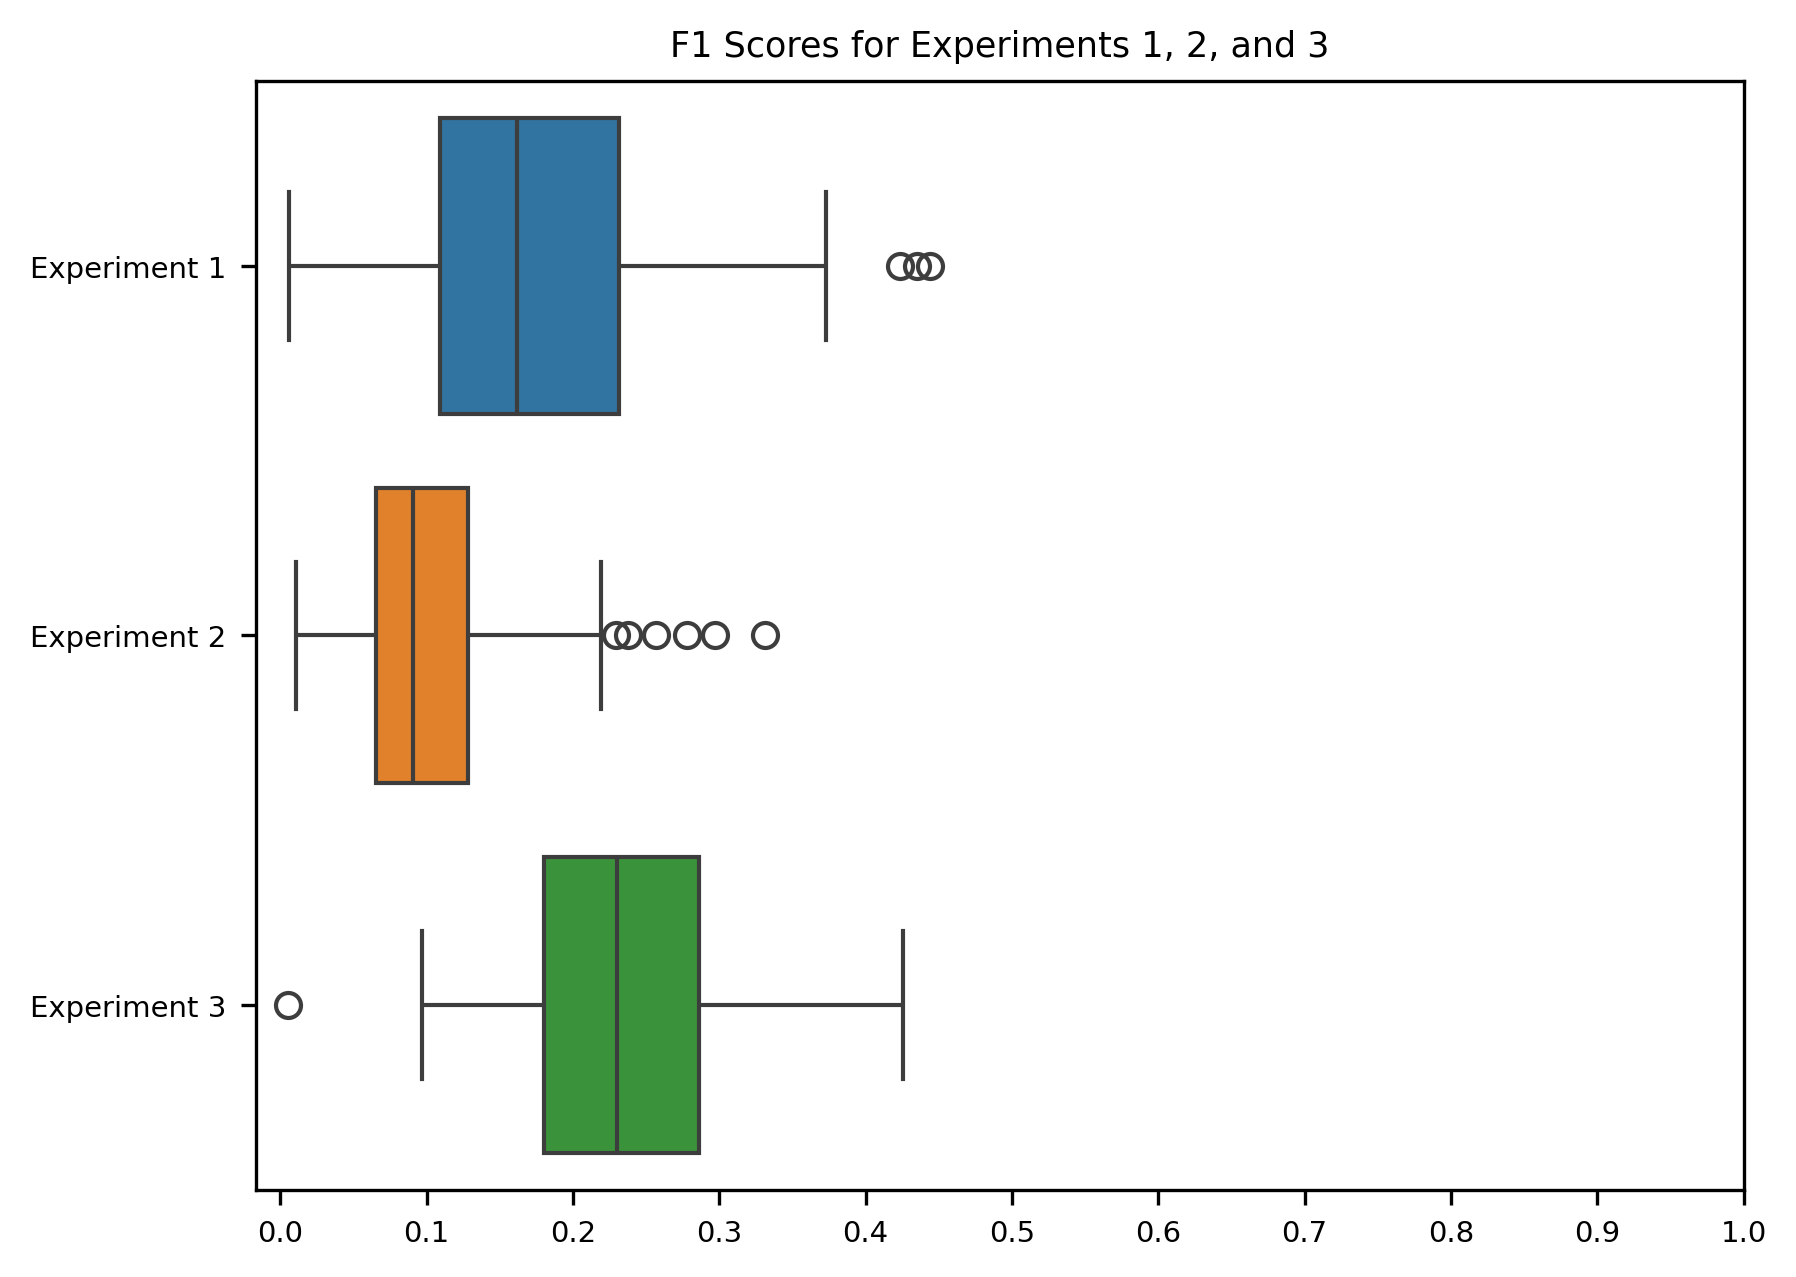

In [68]:
data = {"Experiment 1":exp_1_per_class['F1'], "Experiment 2":exp_2_per_class['F1'], "Experiment 3":exp_3_per_class['F1']}
ax = sns.boxplot(data, orient='h')
ax.set_xticks(np.linspace(0.0, 1.0, 11))
ax.set_title("F1 Scores for Experiments 1, 2, and 3")

## Random Image Samples (includes per-class interpretation figures)

In [76]:
from pathlib import Path
from random import choices

#random file sample with all files (including those in subdirectories)
def random_file_sample(dir):
    k_samples = 400
    file_type = 'png'
    
    file_list = list(Path(dir).rglob('*.{type}'.format(type=file_type)))

    return choices(file_list, k=k_samples)

In [108]:
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2 as cv

#looks like we're aiming for 6x8
def plot_image_samples(samples):
    # #fro now just assume a 20x20 subplot
    # fig = plt.figure()
    # grid = ImageGrid(fig, 111, nrows_ncols=(20, 20))
    
    # for ax, im_file in zip(grid, samples):
    #     img = cv.imread(str(im_file))
    #     img = 255 - img
    #     ax.imshow(img)
    #     ax.axis('off')

    fig, axes = plt.subplots(20, 20)

    for ax, im_file in zip(axes.reshape(-1), samples):
        img = cv.imread(str(im_file))
        img = 255 - img
        ax.imshow(img)
        ax.axis('off')
    
    
    fig.show()


In [ ]:
cn_samples = random_file_sample('..\prepared datasets\CERUG_prepped_02-14-2024\CERUG\CN')

C:\Users\JUDE\AppData\Local\Temp\ipykernel_16292\2674000354.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


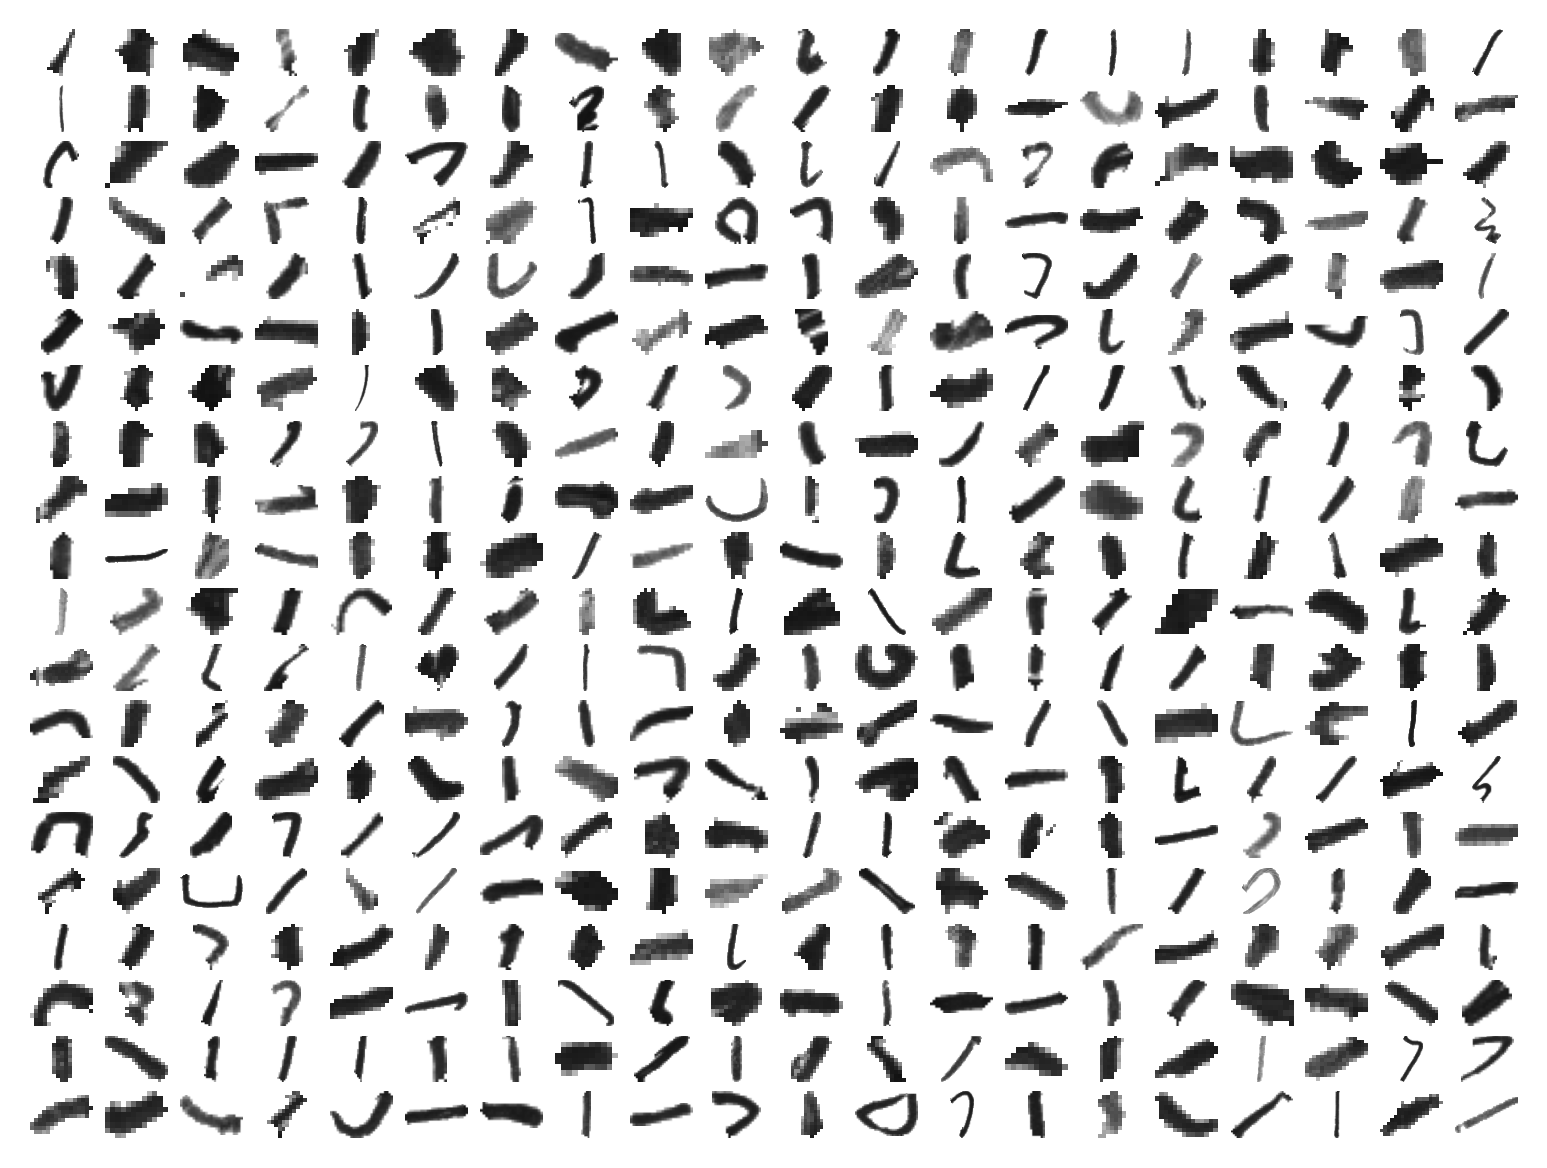

In [109]:
plot_image_samples(cn_samples)

C:\Users\JUDE\AppData\Local\Temp\ipykernel_16292\2475699829.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


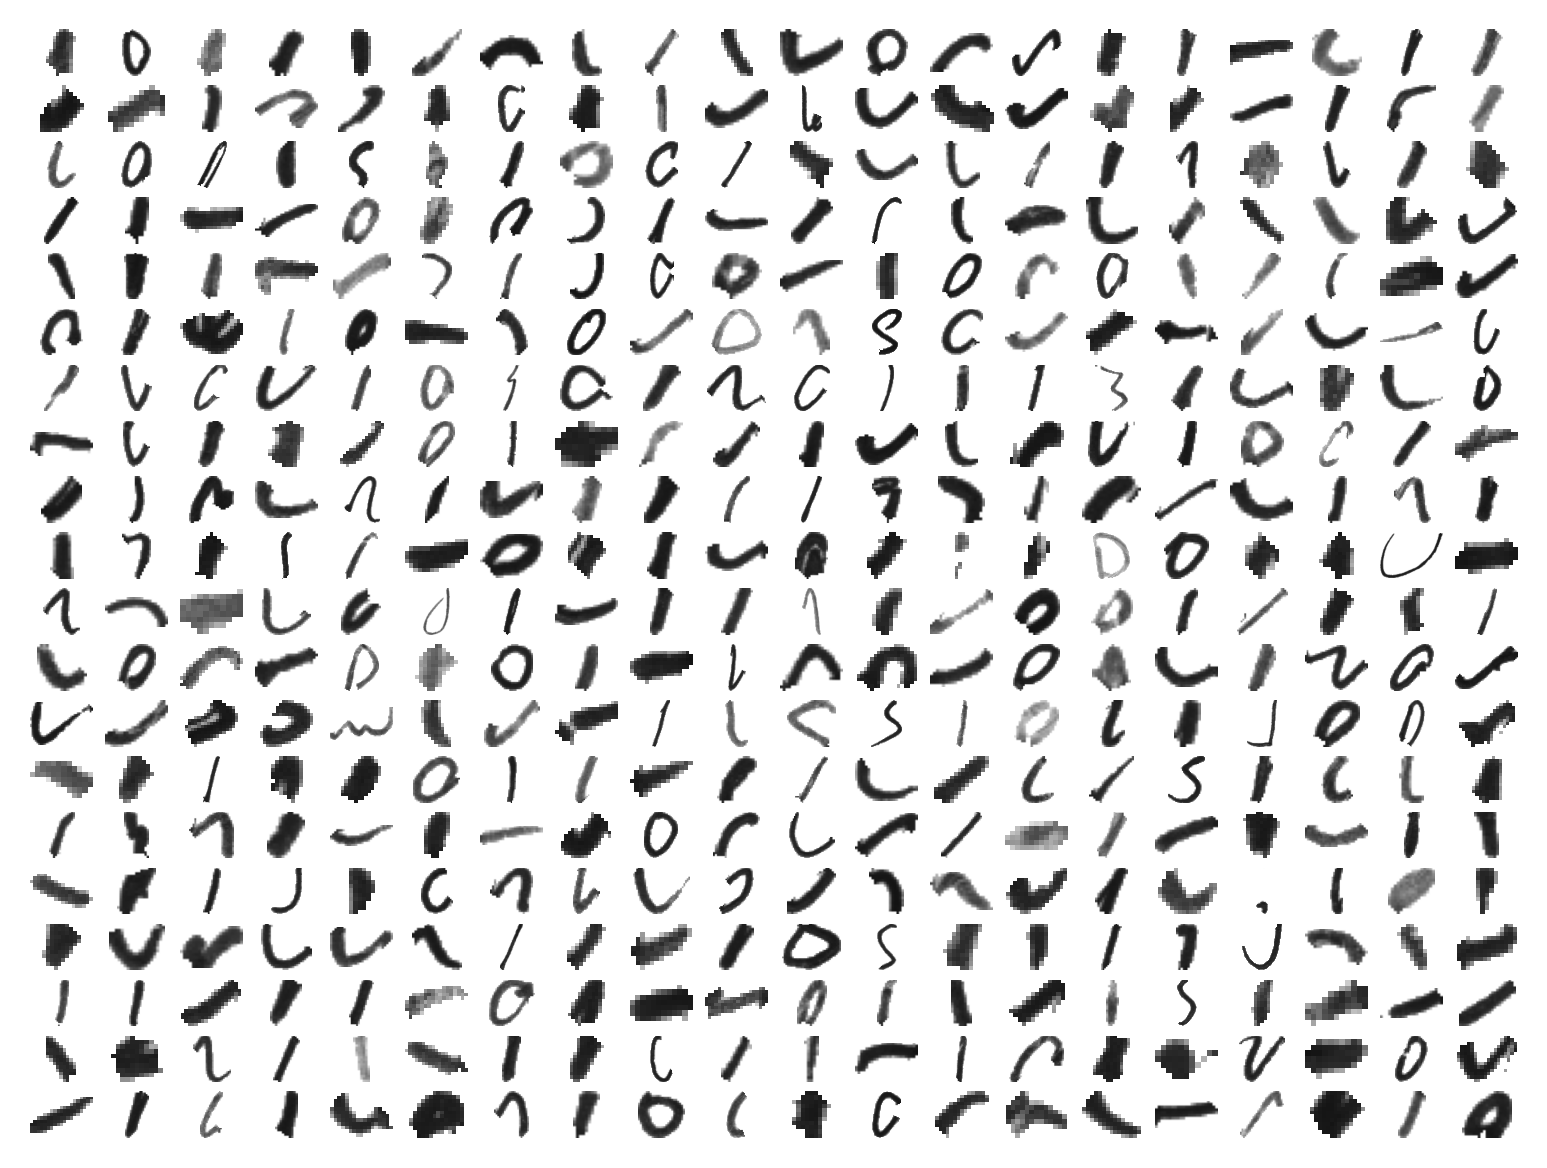

In [100]:
en_samples = random_file_sample('..\prepared datasets\CERUG_prepped_02-14-2024\CERUG\EN')
plot_image_samples(en_samples)

<Axes: >

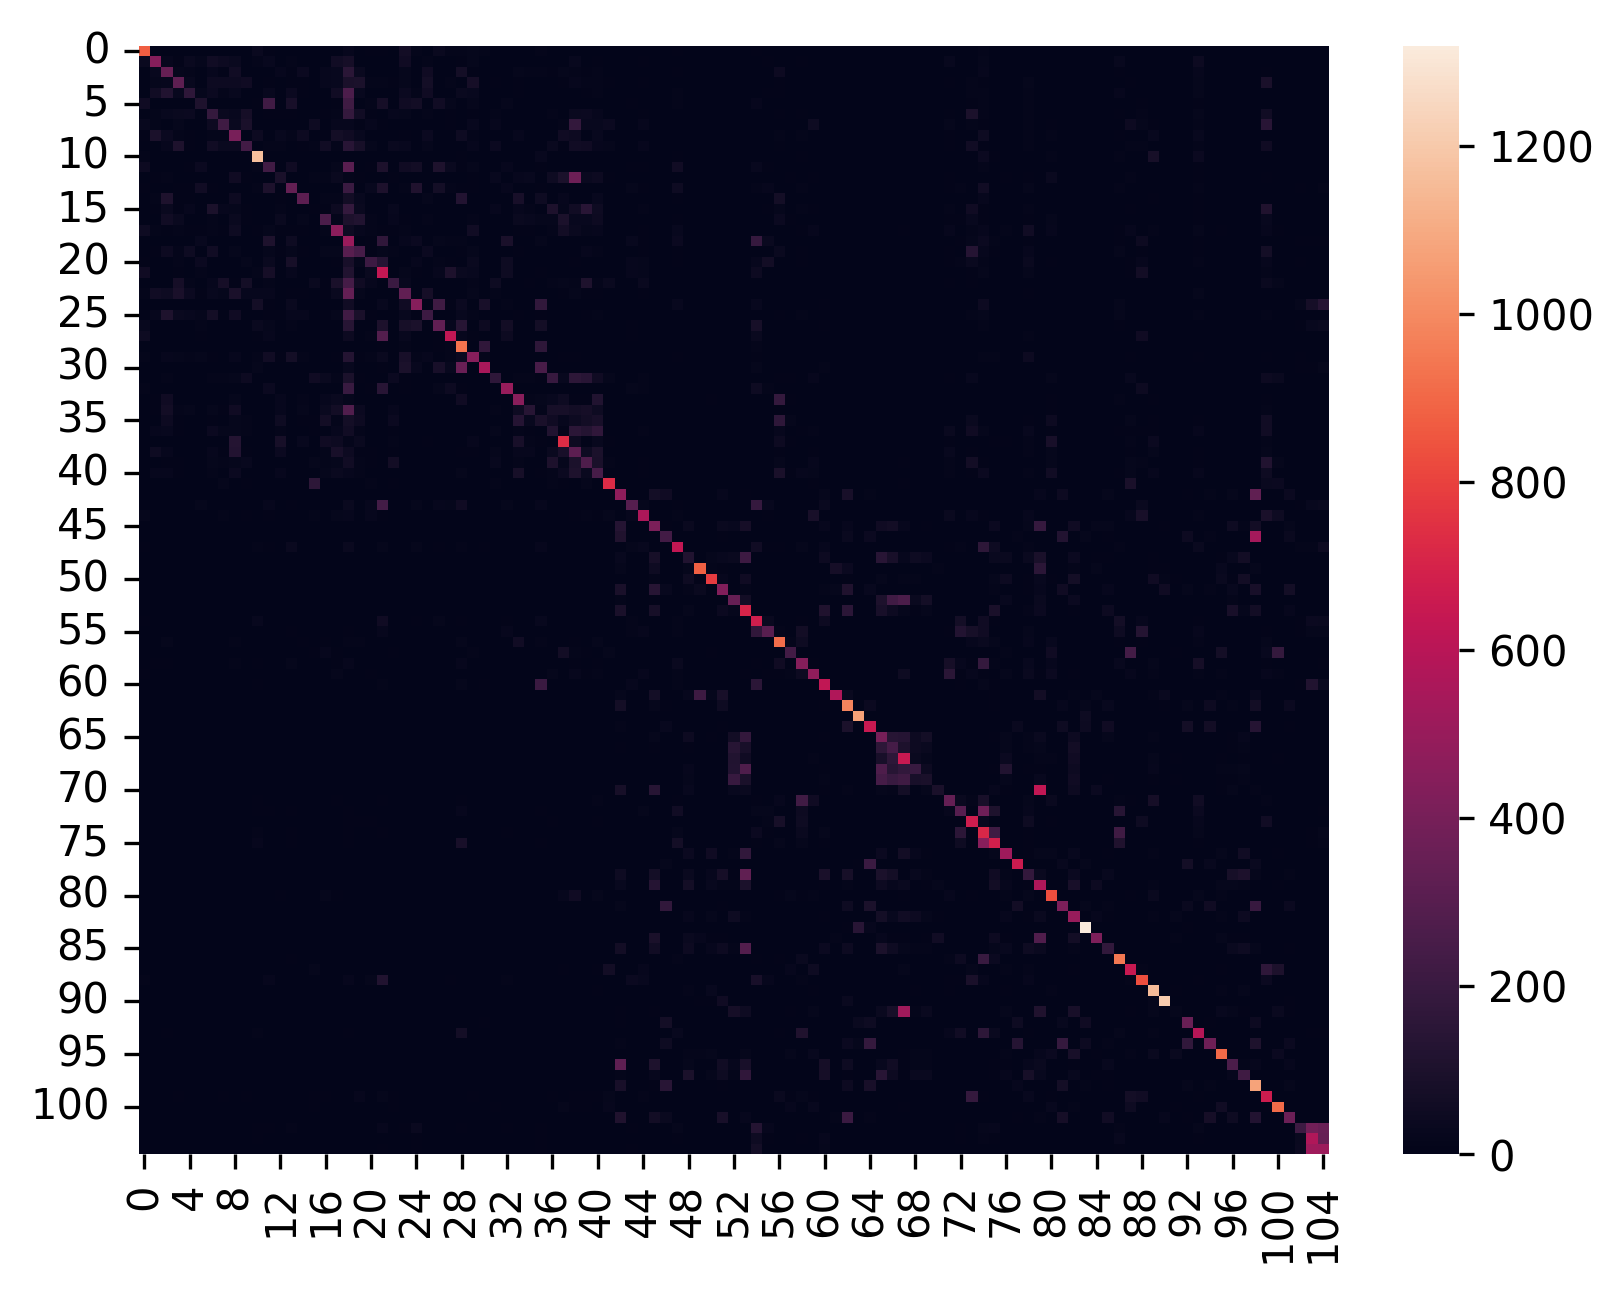

In [17]:
sb.heatmap(exp_1_mat)

## Misc

### CERUG CN-EN distributions

In [18]:
from pathlib import Path
import pandas as pd

#for structure of dataset/writer/scriptname/files
def file_df(dir: str):
    files = Path(dir).rglob('*.*')
    df = pd.DataFrame([x for x in files], columns=['files'])
    df['class'] = df['files'].apply(lambda x: x.parent.parent.name)

    return df


In [19]:
dir = "../prepared datasets/CERUG_prepped_02-14-2024/CERUG"

In [20]:
import os
cn_df = file_df(os.path.join(dir, 'CN'))
labels_cn = cn_df['class'].unique()
counts_cn = cn_df['class'].value_counts(sort=None)

In [21]:
en_df = file_df(os.path.join(dir, 'EN'))
labels_en = en_df['class'].unique() #should be the same
counts_en = en_df['class'].value_counts(sort=None)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def plot_distributions(ax, value_counts, name):
    sns.barplot(data = value_counts, ax=ax)
    #ax.set_xticklabels([x.replace("Writer", "") for x in value_counts.keys()])
    ax.set_xticklabels([])
    # ax.set_yticklabels([])
    #ax.xaxis.set_tick_params(labelsize=2, rotation=45)
    
    ax.set_ylabel("")
    ax.set_xlabel(name)
    ax.tick_params(left=False, bottom=False)

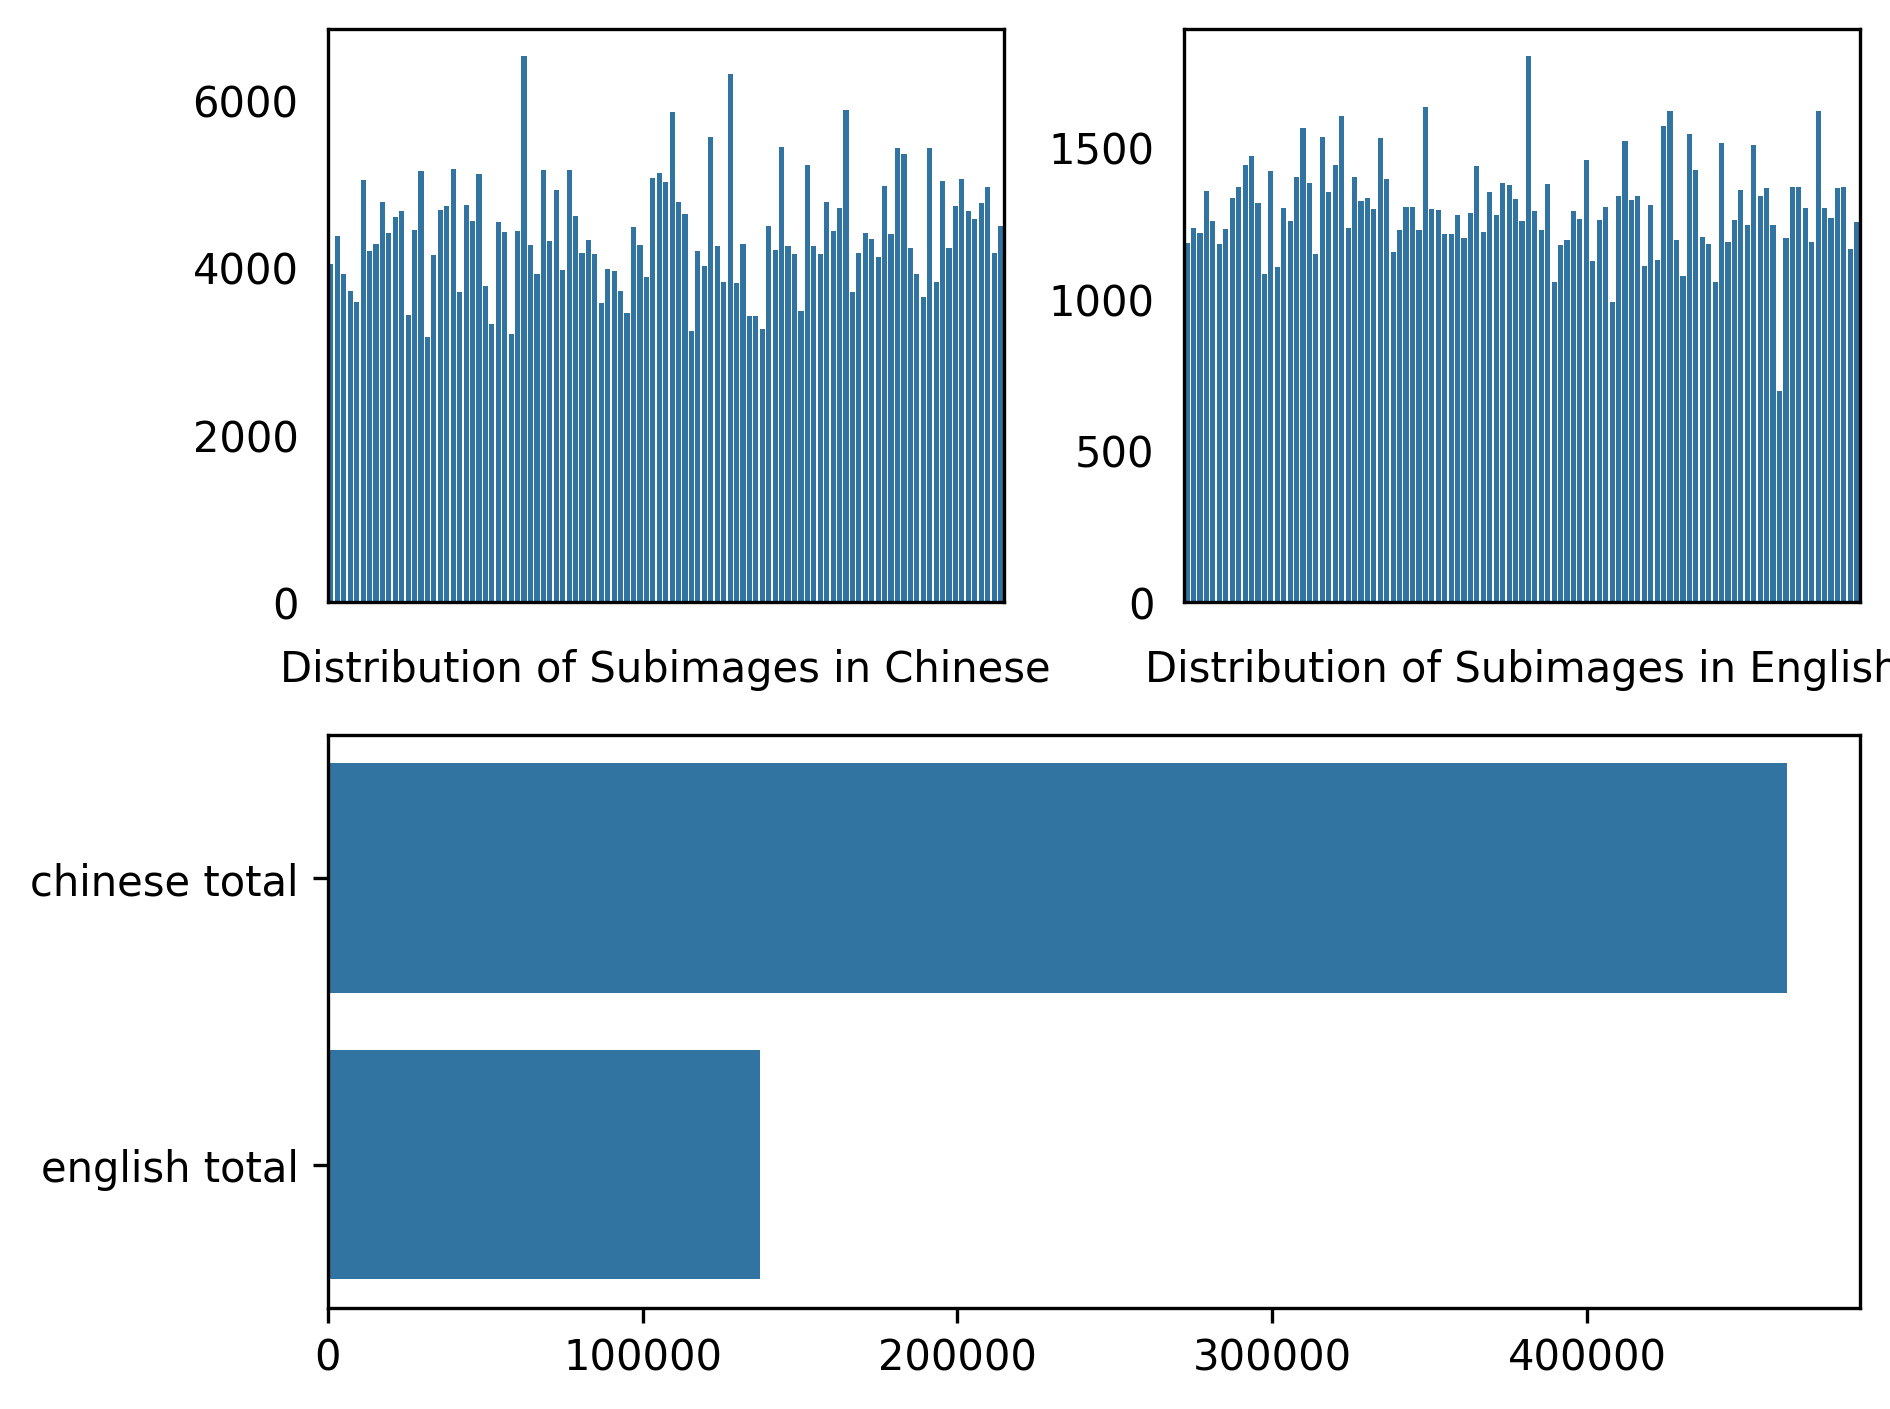

In [25]:
#plt.title("Class Distributions in Chinese and English Vs. Script Distributions")

ax1 = plt.subplot(2, 2, 1)
plot_distributions(ax1, counts_cn, "Distribution of Subimages in Chinese")
ax2 = plt.subplot(2, 2, 2)
plot_distributions(ax2, counts_en, "Distribution of Subimages in English")


cn_total = counts_cn.sum()
en_total = counts_en.sum()

big_ax = plt.subplot(212)
sns.barplot(data = {"chinese total":cn_total, "english total":en_total}, orient='h', ax=big_ax)
# big_ax.set_xticklabels([])
# big_ax.set_xticks([])
plt.tight_layout()
plt.show()



In [ ]:
print("minimum f1 score of Experiment 1: ", df['1 F1'].idxmin())
print("minimum f1 score of Experiment 2: ", df['2 F1'].idxmin())
print("minimum f1 score of Experiment 3: ", df['3 F1'].idxmin())
print("maximum f1 score of Experiment 1: ", df['1 F1'].idxmax())
print("maximum f1 score of Experiment 2: ", df['2 F1'].idxmax())
print("maximum f1 score of Experiment 3: ", df['3 F1'].idxmax())


minimum f1 score of Experiment 1:  Writer1616
minimum f1 score of Experiment 2:  Writer9101
minimum f1 score of Experiment 3:  Writer5656
maximum f1 score of Experiment 1:  Writer6464
maximum f1 score of Experiment 2:  Writer6464
maximum f1 score of Experiment 3:  Writer6464


In [122]:
locs = ['Writer1616', 'Writer9101', 'Writer5656', 'Writer6464']
range_df = df.loc[locs]
range_df['samples cn'] = counts_cn.loc[locs]
range_df['samples en'] = counts_en.loc[locs]
range_df

,1 precision,1 recall,1 F1,2 precision,2 recall,2 F1,3 precision,3 recall,3 F1,samples cn,samples en
Writer1616,0.023,0.008,0.006,0.060,0.019,0.014,0.186,0.218,0.100,3174,1299
Writer9101,0.107,0.015,0.013,0.023,0.021,0.011,0.504,0.404,0.224,3916,1244
Writer5656,0.420,0.243,0.154,0.236,0.169,0.098,0.018,0.007,0.005,4635,1228
Writer6464,0.833,0.950,0.444,0.651,0.673,0.331,0.886,0.820,0.426,3816,1126


C:\Users\JUDE\AppData\Local\Temp\ipykernel_16292\2674000354.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


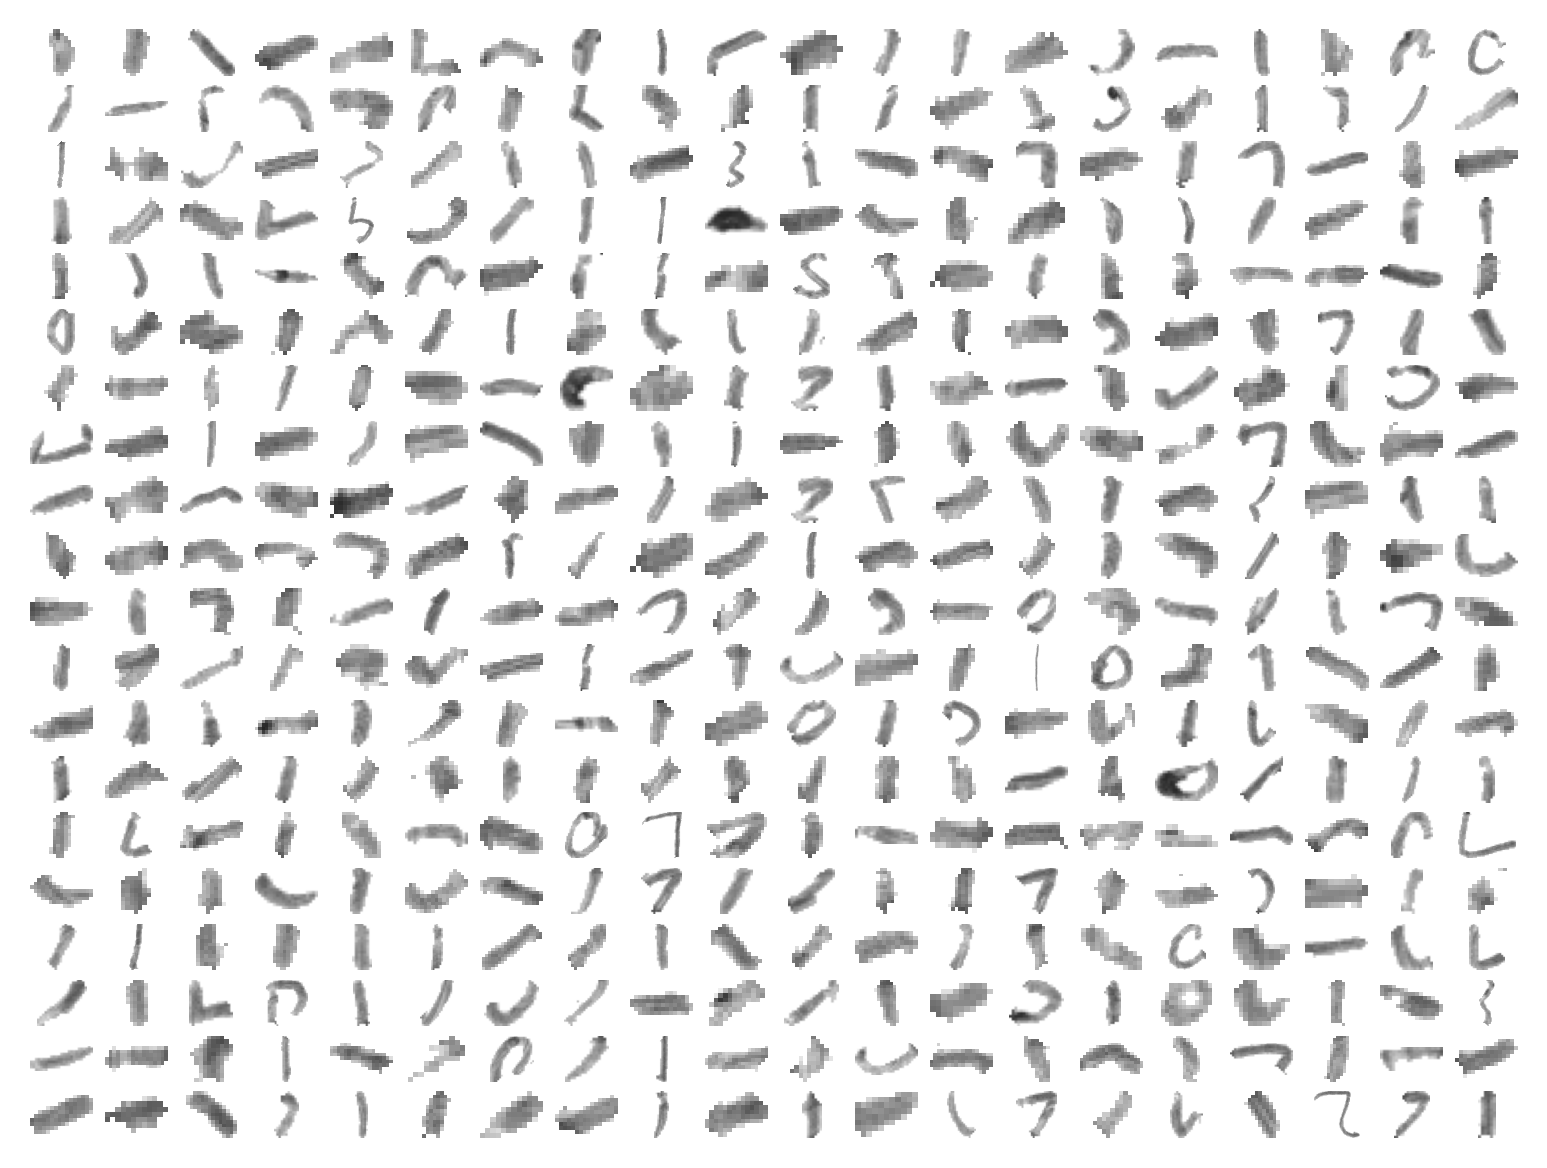

In [123]:
Writer6464_samples = random_file_sample('..\prepared datasets\CERUG_prepped_02-14-2024\CERUG\MERGED\Writer6464')
plot_image_samples(Writer6464_samples)

C:\Users\JUDE\AppData\Local\Temp\ipykernel_16292\2674000354.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


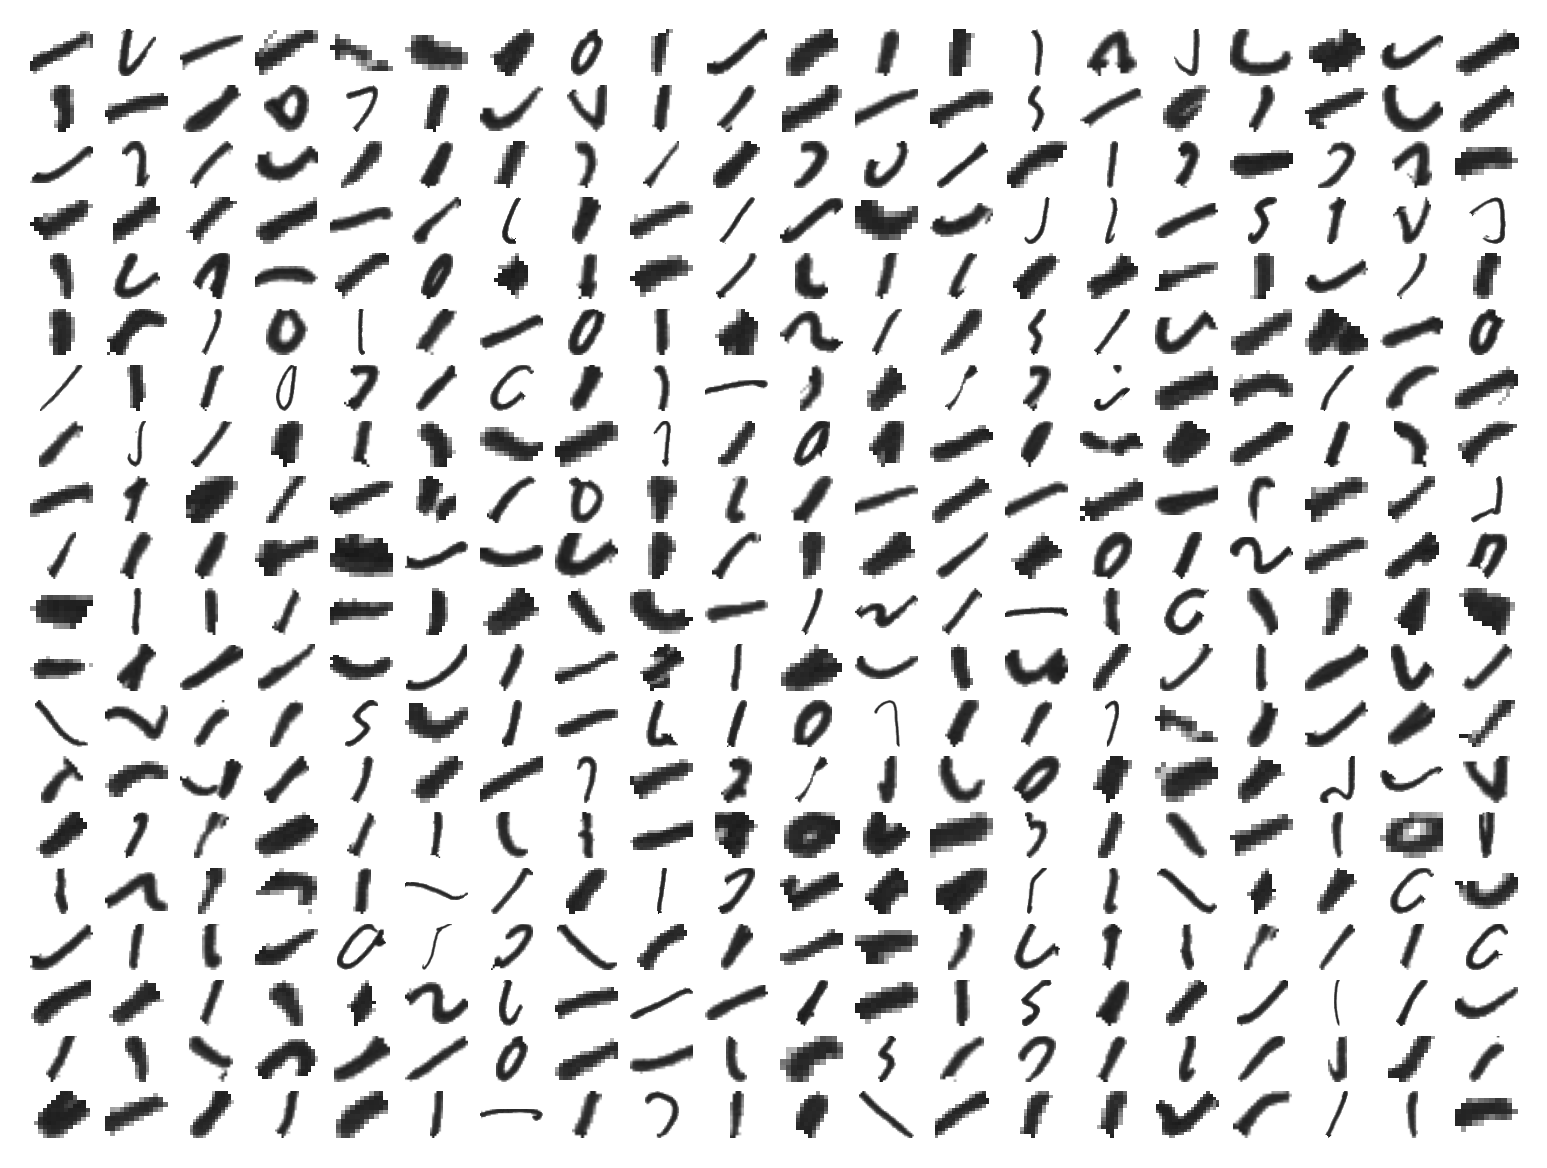

In [124]:
Writer1616_samples = random_file_sample('..\prepared datasets\CERUG_prepped_02-14-2024\CERUG\MERGED\Writer1616')
plot_image_samples(Writer1616_samples)

C:\Users\JUDE\AppData\Local\Temp\ipykernel_16292\2674000354.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


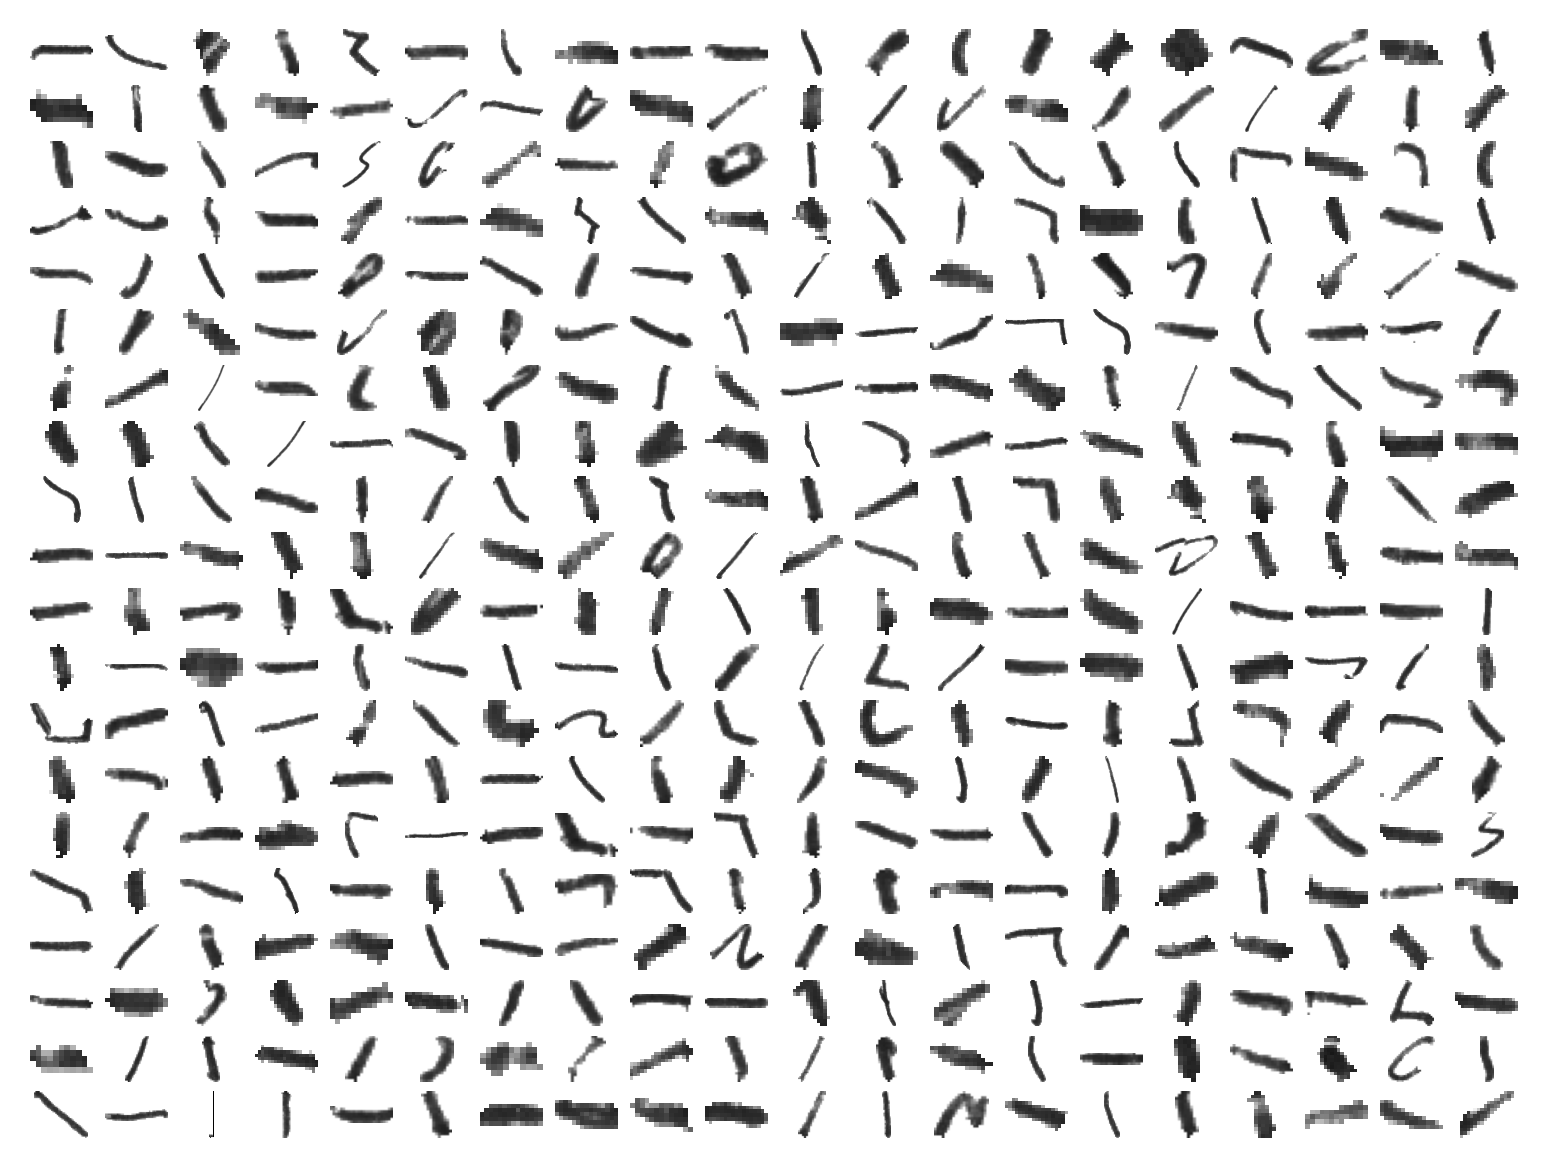

In [126]:
Writer9101_samples = random_file_sample('..\prepared datasets\CERUG_prepped_02-14-2024\CERUG\MERGED\Writer9101')
plot_image_samples(Writer9101_samples)

### Simple Graph Segmentation Visualization

In [26]:
import cv2 as cv
from skimage.morphology import skeletonize
import networkx as nx

#module for converting skeleton networks into a graph representation
import sknw

from qdanalysis.preprocessing import preprocess

In [27]:
eng_test = cv.imread(r'CERUG_EN_Test.png')
eng_test_gs, eng_test_bin = preprocess(eng_test)
eng_test_skele = skeletonize(eng_test_bin)

In [28]:
#going to assume a preprocesed image is fed in
def segment_stroke_fragments(image):
    labels = np.zeros_like(image, dtype=int)

    #can't decide if I should pass in the graph or do it in the function like this
    graph = sknw.build_sknw(image, multi=True, full=False, ring=True)

    #TODO: figure out a way to vectorize the outer portion
    for label_idx, (node1, node2, idx) in enumerate(graph.edges):
        edge_points = graph[node1][node2][idx]['pts']

        labels[edge_points[:, 0], edge_points[:, 1]] = label_idx + 1 #need to account for zero indexing
    
    return labels, graph

eng_test_skele_labeled, graph = segment_stroke_fragments(eng_test_skele)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
label_coords = np.array(eng_test_skele_labeled.nonzero()).T
labels = eng_test_skele_labeled[label_coords[:, 0], label_coords[:, 1]] #not sure if actually required

In [31]:
cls = KNeighborsClassifier(n_neighbors=3)
cls.fit(label_coords, labels)

KNeighborsClassifier(n_neighbors=3)

In [32]:
img_coords = np.array(eng_test_bin.nonzero()).T
img_labels = cls.predict(img_coords)
img_labels

array([ 1,  1,  1, ..., 52, 52, 52])

In [33]:
labeled_image = np.zeros_like(eng_test_gs, dtype=int)
labeled_image[img_coords[:, 0], img_coords[:, 1]] = img_labels

Text(0.5, 0.9, 'Simple Graph Segmentation Method')

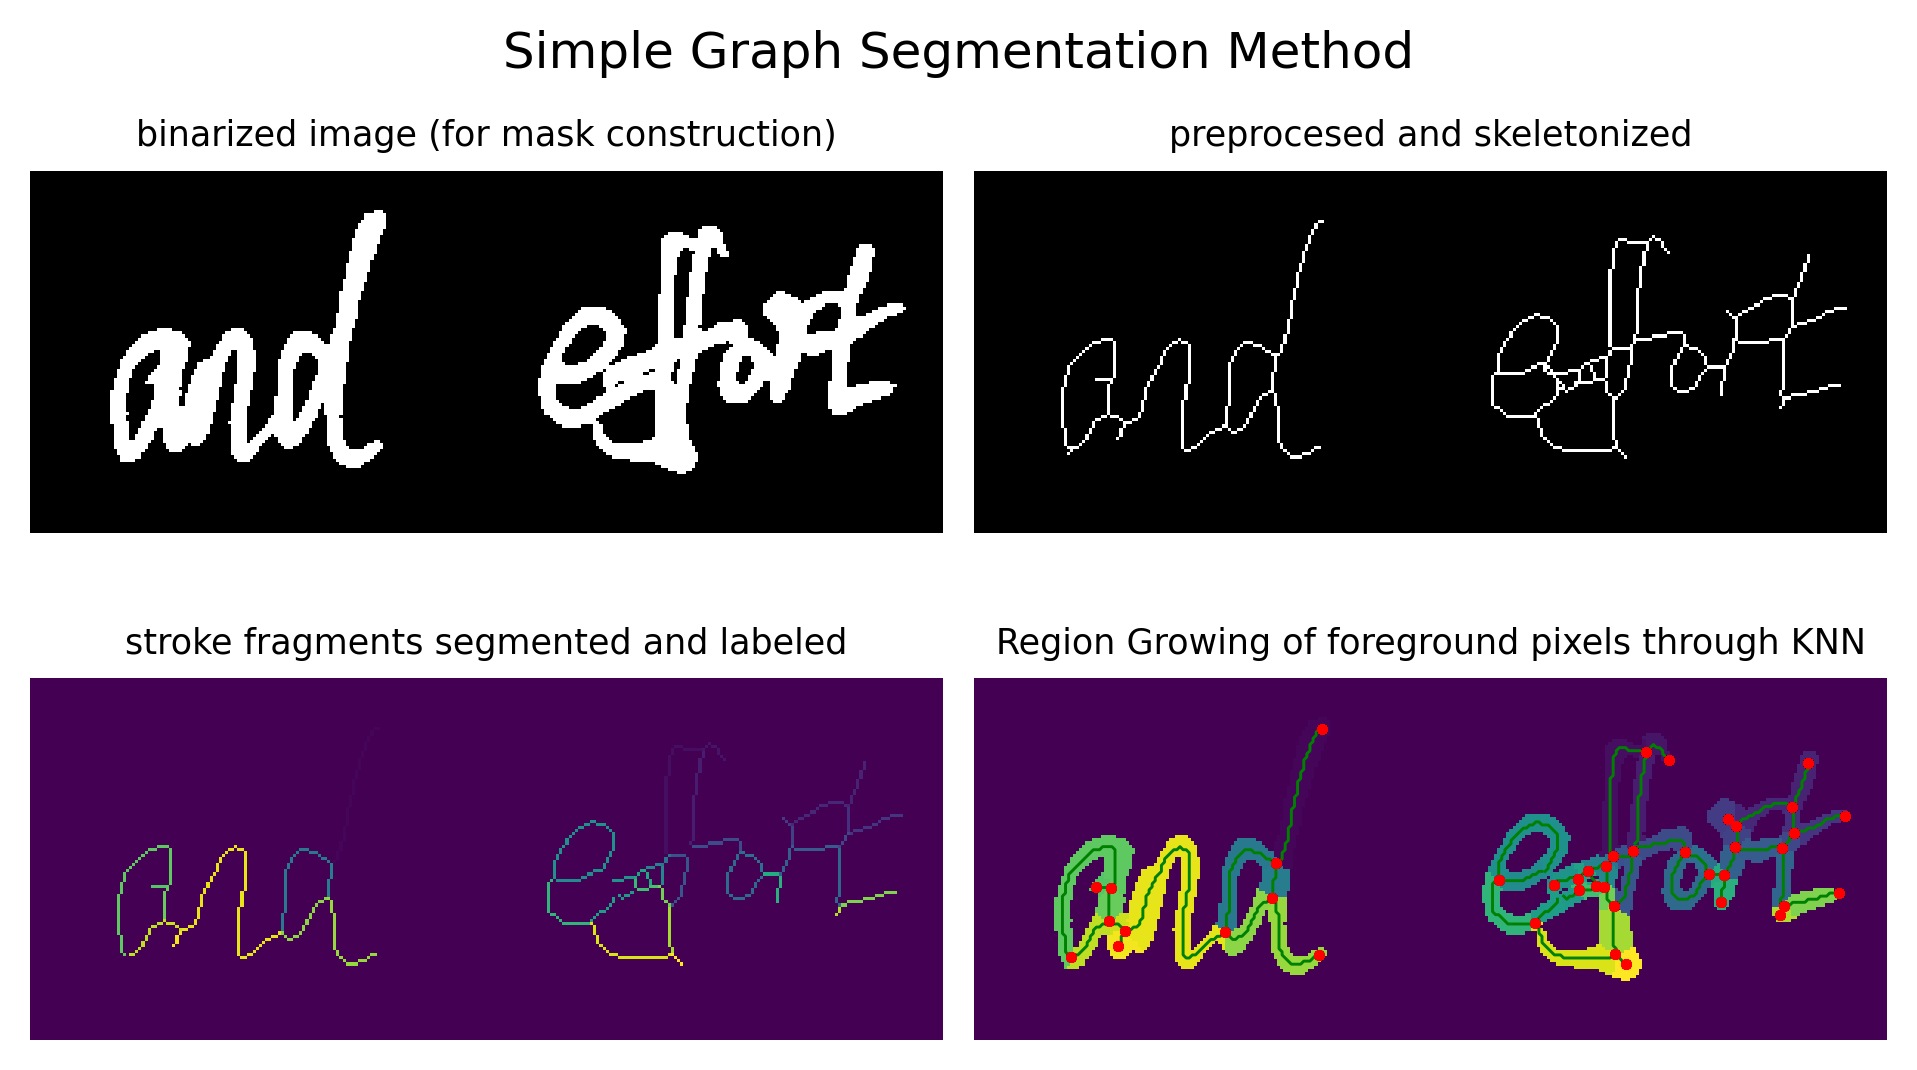

In [34]:
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['font.size'] = 7

#figure for presentation
fig, axes = plt.subplots(2, 2)

#original image
#eng_test_orig = cv.imread("CERUG_EN_Test.png")
axes[0, 0].imshow(eng_test_bin, cmap='gray')
axes[0, 0].set_title("binarized image (for mask construction)")
axes[0, 0].axis("off")

#preprocessed
axes[0, 1].imshow(eng_test_skele, cmap='gray')
axes[0, 1].set_title("preprocesed and skeletonized")
axes[0, 1].axis("off")

#graph representation
axes[1, 0].imshow(eng_test_skele_labeled, interpolation="nearest")
axes[1, 0].set_title("stroke fragments segmented and labeled")
axes[1, 0].axis("off")

# region growing?
axes[1, 1].imshow(labeled_image, interpolation="nearest")
axes[1, 1].set_title("Region Growing of foreground pixels through KNN")
axes[1, 1].axis("off")

# draw edges by pts
for (s, e_dict, idx) in graph.edges: 
        ps = graph[s][e_dict][idx]['pts']
        plt.plot(ps[:, 1], ps[:, 0], 'green', linewidth=.7)
#plot nodes of graph
for (start, end) in graph.edges():
    nodes = graph.nodes()
    ps = np.array([nodes[i]['o'] for i in nodes])
    axes[1, 1].plot(ps[:, 1], ps[:, 0], 'r.', markersize=3)

padding = 0.01
fig.subplots_adjust(wspace=padding, hspace=-.5)
fig.tight_layout()
fig.suptitle("Simple Graph Segmentation Method", y=.9, fontsize=12)
